In [2]:
%matplotlib inline
%load_ext autoreload
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import datetime
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
import neuralnet
%aimport neuralnet
%aimport

Modules to reload:
neuralnet

Modules to skip:



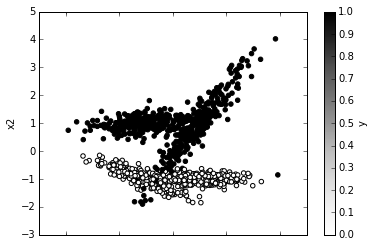

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(1100, n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_repeated=0)
pd.DataFrame({"x1":X[:,0], "x2":X[:,1],"y":y}).plot(kind='scatter',x='x1', y='x2', c='y')
y = pd.get_dummies(y).values

In [12]:
def squared_error(y, y_hat):
    return (y - y_hat).dot((y - y_hat))

def squared_error_prime(y, y_hat):
    return -1 * (y - y_hat)

def t(z):
    return np.tanh(z)

def t_prime(z):
    return 1 - np.power(t(z), 2)

In [77]:
%autoreload
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 50
layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), t, t_prime)
nn = neuralnet.NeuralNet(layer1, layer2, squared_error, squared_error_prime)
nn.train(X, y, num_iters=100)
nn.plot_scores()

In [80]:
def load_training_data():
    raw_train_images = scipy.io.loadmat("dataset/train.mat")['train_images'].T.reshape(60000, 784) / 255.0

    raw_train_labels = scipy.io.loadmat("dataset/train.mat")['train_labels'].reshape(60000, )

    tX, XVal, ty, yVal = train_test_split(raw_train_images, raw_train_labels,
                                          test_size=0.25, random_state=10)
    tX = tX
    XVal = XVal

    return {"X": tX, "y": ty, "XVal": XVal, "yVal": yVal}

train_dict = load_training_data()
X = train_dict['X']
y = train_dict['y']
print("Mean of y:", y.mean())
y = pd.get_dummies(y).values

XVal = train_dict['XVal']
yVal = pd.get_dummies(train_dict['yVal']).values

print("Num Trainings", len(X))

Mean of y: 4.44715555556
Num Trainings 45000


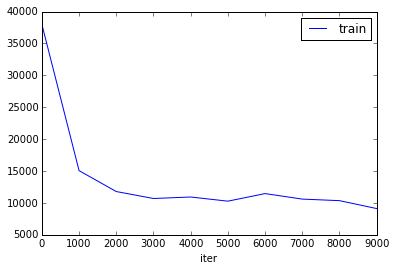

In [82]:
%autoreload
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 200
layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), t, t_prime)
nn = neuralnet.NeuralNet(layer1, layer2, squared_error, squared_error_prime)
nn.train(X, y, num_iters=10000)
nn.plot_scores()